### 2.3 Neighborhood analysis of movies

In [1]:
library(igraph)
library(data.table)
library(network)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

network: Classes for Relational Data
Version 1.13.0.1 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.


Attaching package: ‘network’

The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, 

In [2]:
g = read.graph("movie_edge_list2.txt", format="ncol", directed=FALSE)

In [3]:
mov_info = fread(input="movie_genre_rating_new.txt", sep = "\t", header = FALSE)

In [4]:
rating_data = fread(input="movie_rating_new.txt", sep = "\t", header = FALSE)

In [5]:
rating_list = c()
movie_name = ""
for (i in 1:vcount(g)){
    movie_id = V(g)$name[i]
    if (movie_id %in% mov_info$V1) {
        movie_name = mov_info$V2[which(mov_info$V1 == movie_id)]
    }
    if(movie_name %in% rating_data$V1){
        rate = rating_data$V2[which(rating_data$V1 == movie_name)]
    } else {
        rate = "NA"
    }
    rating_list = rbind(rating_list, rate)
}

Warning message in rbind(rating_list, rate):
“number of columns of result is not a multiple of vector length (arg 2)”Warning message in rbind(rating_list, rate):
“number of columns of result is not a multiple of vector length (arg 2)”

In [6]:
V(g)$rating = rating_list

In [125]:
Neighborhood = function(g, movie) {
    id = which(V(g)$name == movie)
    neighbor_ids = neighbors(g,id)
    rating_list = c()
    for (neighbor_id in neighbor_ids) {
        rate = V(g)[neighbor_id]$rating
        if (is.na(rate) | rate != "NA") {
            rating_list = rbind(rating_list, rate)
        }
    }
    table = table(rating_list)
    table_len = length(table)
    occurance = as.vector(table)
    ratio = occurance/sum(occurance)
    prob = ratio/sum(ratio)
    seq = seq(1, table_len, by = 1)
    seq_num = as.numeric(names(table))
    print(sprintf("Most frequent rating in neighborhood: %s with %s occurrance and %s frequency", seq_num[which.max(prob)], occurance[which.max(prob)], ratio[which.max(prob)]))
    print(sprintf("Average rating of neighbors: %s", mean(seq_num)))
    plot(seq, prob, type = "h", main = sprintf("Distribution of Available Movie Ratings in Neighborhood (Id: %s)", movie), xlab = "Rating Degree", ylab = "Frequency")
    text(prob, labels = names(table), cex=0.5, font=2.5, col="red")
    return (id)
}

[1] "Most frequent rating in neighborhood: 6.4 with 38 occurrance and 0.0447058823529412 frequency"
[1] "Average rating of neighbors: 5.78714285714286"


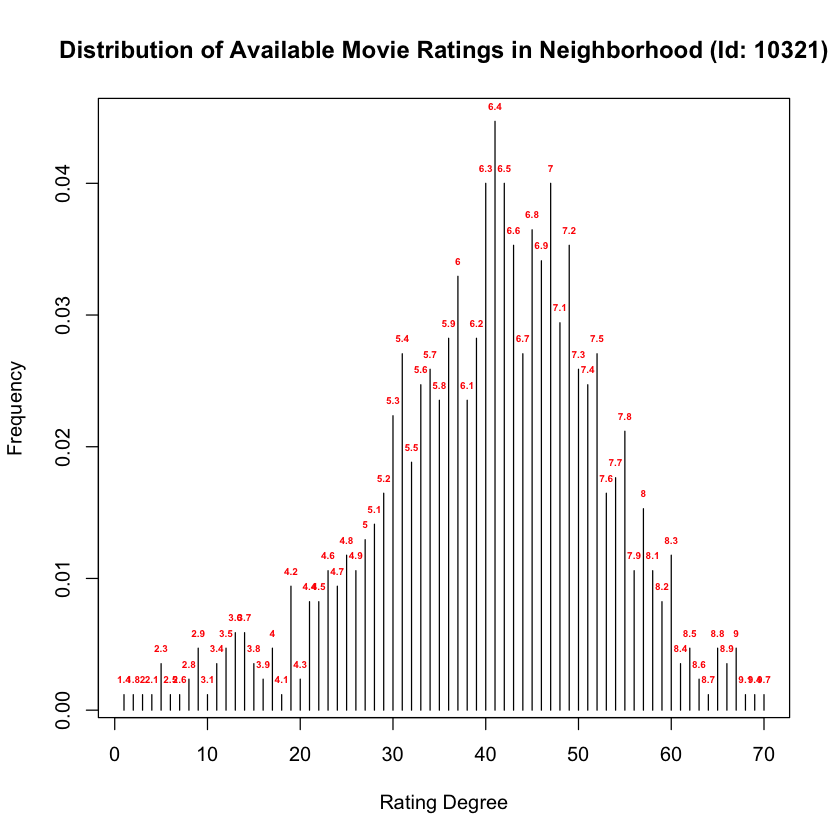

In [126]:
# Batman v Superman: Dawn of Justice (2016); Rating: 6.6
# id #: 10321
id1 = Neighborhood(g,10321)


[1] "Most frequent rating in neighborhood: 6.2 with 31 occurrance and 0.047040971168437 frequency"
[1] "Average rating of neighbors: 5.64117647058824"
[1] "Most frequent rating in neighborhood: 6.8 with 28 occurrance and 0.0380952380952381 frequency"
[1] "Average rating of neighbors: 6.0695652173913"


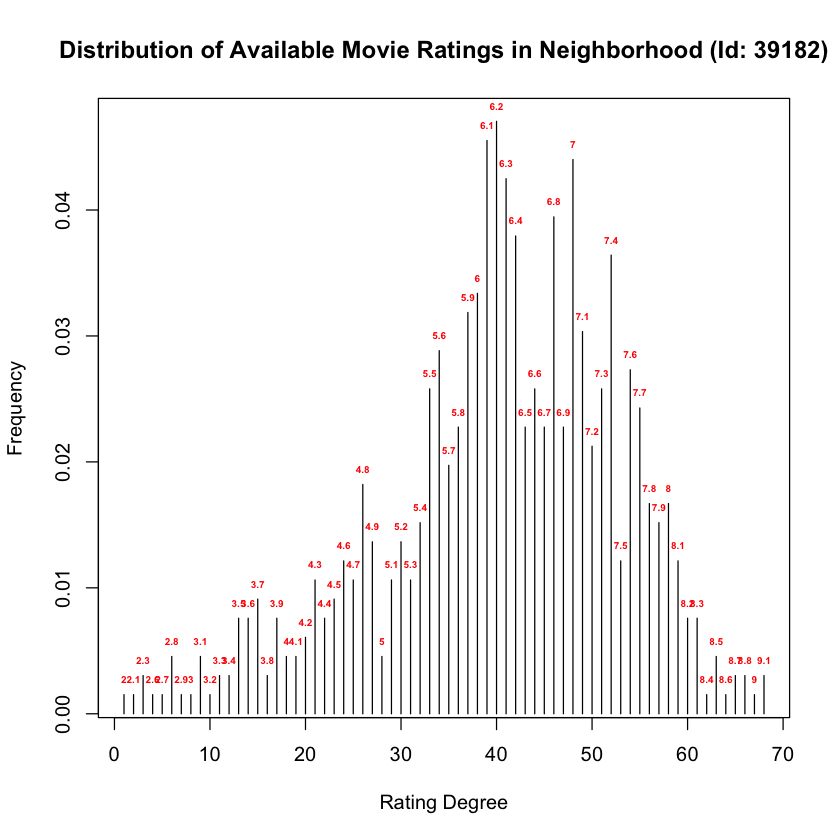

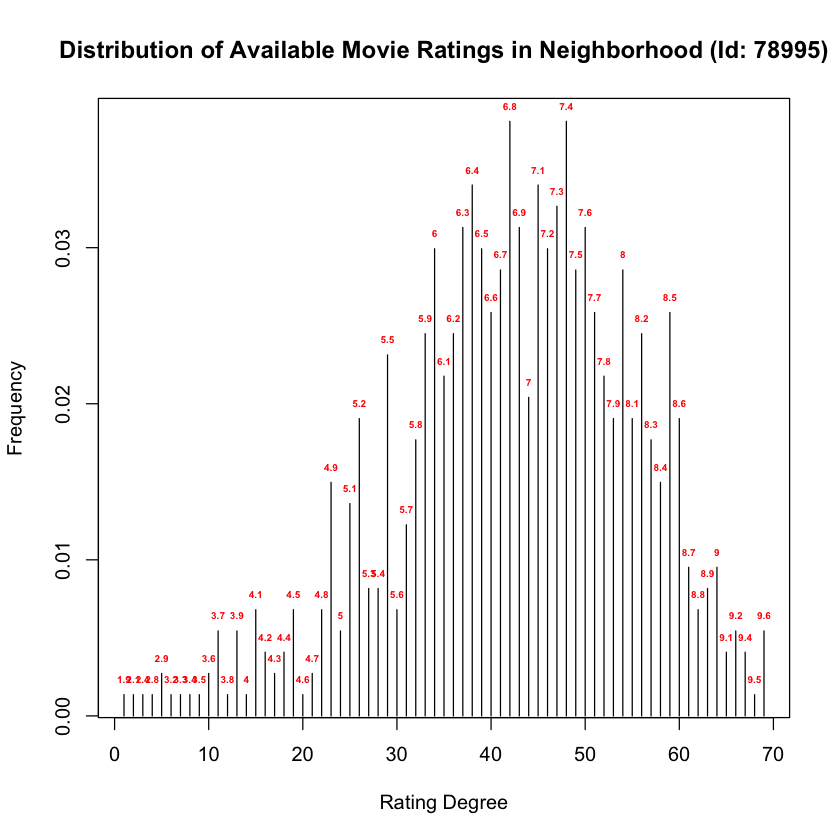

In [127]:
# Mission: Impossible - Rogue Nation (2015); Rating: 7.4
# id #: 39182
id2 = Neighborhood(g,39182)
# Minions (2015); Rating: 6.4
# id #: 78995
id3 = Neighborhood(g,78995)

## Question 10

In [79]:
communities <- readRDS("moviefg.rds")

In [27]:
Same_Community = function(g, communities, movies, ids) {
    same_community = list()
    for(i in 1:length(sizes(communities))) { 
        movies_same_com = (1:vcount(g))[communities$membership == i]
        for (j in 1:length(movies)) {
            mov = V(g)[movies_same_com]
            id = ids[j]
            if ( id %in% mov) {
                sub_g = induced_subgraph(g, mov)
                same_community[[j]] = sub_g
            }
        }
    }
    return (same_community)
}

In [36]:
Same_Comm_Neighborhood = function(g, movie) {
    id = which(V(g)$name == movie)
    neighbor_ids = neighbors(g,id)
    rating_list = c()
    for (neighbor_id in neighbor_ids) {
        rate = V(g)[neighbor_id]$rating
        if (is.na(rate) | rate != "NA") {
            rating_list = rbind(rating_list, rate)
        }
    }
    table = table(rating_list)
    table_len = length(table)
    occurance = as.vector(table)
    ratio = occurance/sum(occurance)
    prob = ratio/sum(ratio)
    seq = seq(1, table_len, by = 1)
    seq_num = as.numeric(names(table))
    print(sprintf("Most frequent rating in neighborhood from the same community: %s with %s occurrance and %s frequency", seq_num[which.max(prob)], occurance[which.max(prob)], ratio[which.max(prob)]))
    print(sprintf("Average rating of neighbors from the same community.: %s", mean(seq_num)))
    plot(seq, prob, type = "h", main = sprintf(" Neighborhood Rating Distribution from Same Community (Id: %s)", movie), xlab = "Rating Degree", ylab = "Frequency")
    text(prob, labels = names(table), cex=0.5, font=2.5, col="red")
    return (id)
}

[1] "Most frequent rating in neighborhood from the same community: 6.4 with 34 occurrance and 0.0454545454545455 frequency"
[1] "Average rating of neighbors from the same community.: 5.69117647058824"
[1] "Most frequent rating in neighborhood from the same community: 6.1 with 26 occurrance and 0.0488721804511278 frequency"
[1] "Average rating of neighbors from the same community.: 5.7359375"


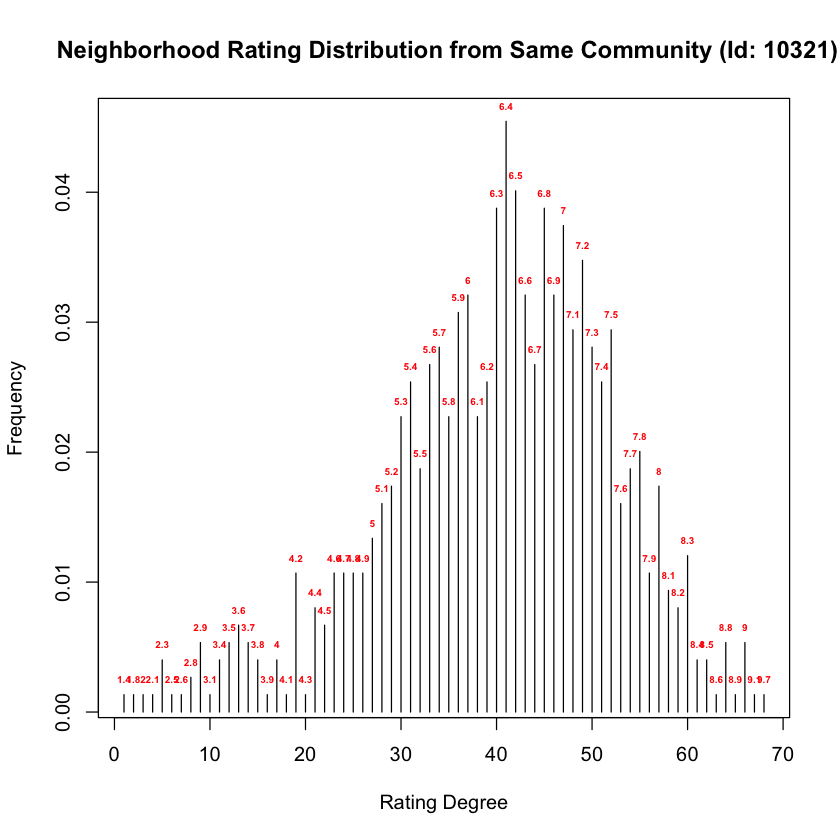

[1] "Most frequent rating in neighborhood from the same community: 7.3 with 19 occurrance and 0.0446009389671361 frequency"
[1] "Average rating of neighbors from the same community.: 6.445"


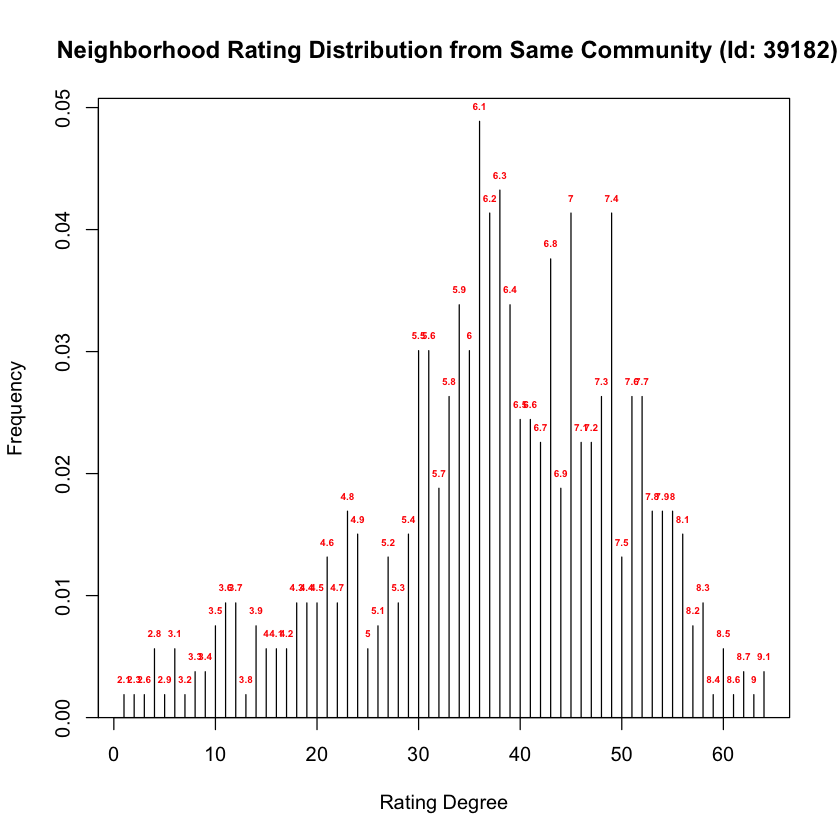

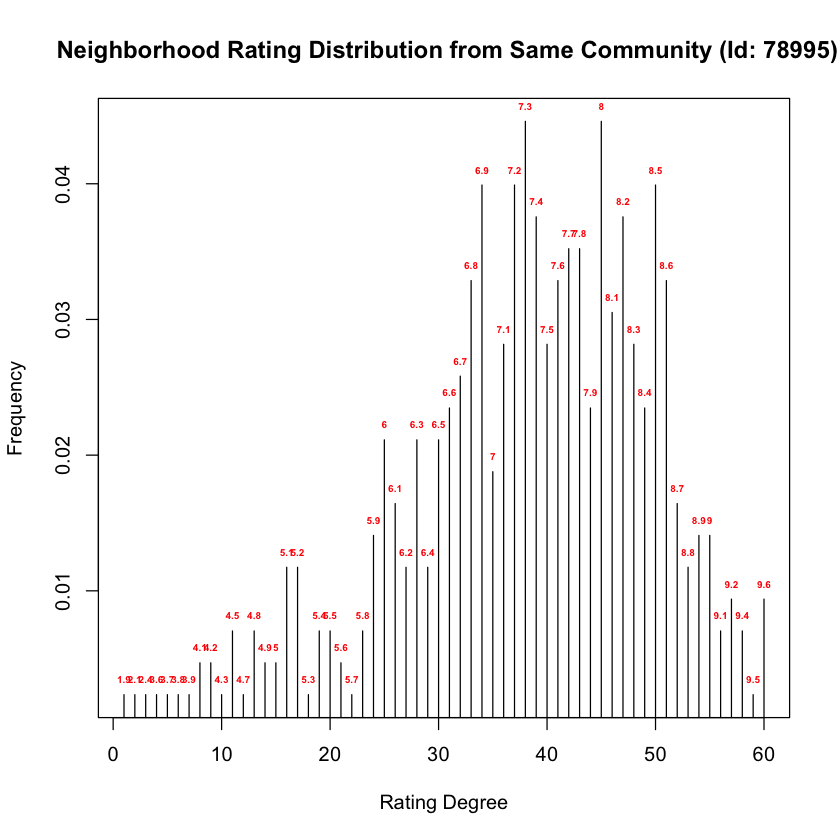

In [109]:
movies = c(10321,39182,78995)
ids = c(id1,id2,id3)
coms = Same_Community(g, communities, movies, ids)
for(i in 1:length(coms)) {
    com = coms[[i]]
    Same_Comm_Neighborhood(com,movies[i])
}

In [110]:
print(ids)

[1] 88277 88677 50767


## Question 11

In [70]:
ids_search = function(g, movies) {
    ids = list()
    for (i in movies) {
        id = which(V(g)$name == i)
        ids = rbind(ids, id)
    } 
    return (ids)
}

membership_search = function(g, communities, movies) {
    ids = ids_search(g, movies)
    membership = list()
    for(i in 1:length(sizes(communities))) { 
        same_com_mov = (1:vcount(g))[communities$membership == i]
        for (j in 1:length(movies)) {
            vids = V(g)[same_com_mov]
            id = ids[j]
            if ( id %in% vids) {
                membership[[j]] = i
            }
        }
    }
    return (membership)
}

In [44]:
edge1 <- E(g)[from(88277)]

In [46]:
edge1_weights <- order(edge1$weight, decreasing=TRUE)[1:5]

In [47]:
E(g)[as.vector(e1)[edge1_weights]]

+ 5/66518974 edges from 89f78ca (vertex names):
[1] 22165--10321 10321--10363 10321--33301 10321--9502  3384 --10321

In [105]:
mov1 = c(22165,10363,33301,9502,3384)
membership1 = membership_search(g,communities,mov1)
membership1

[[1]]
[1] 1

[[2]]
[1] 1

[[3]]
[1] 1

[[4]]
[1] 1

[[5]]
[1] 1

In [85]:
edge2 <- E(g)[from(88677)]
edge2_weights <- order(edge2$weight, decreasing=TRUE)[1:5]
E(g)[as.vector(e2)[edge2_weights]]

+ 5/66518974 edges from 89f78ca (vertex names):
[1] 39182--32741 32744--39182 57762--39182 68813--39182 39182--39183

In [106]:
mov2 = c(32741,32744,57762,68813,39183)
membership2 = membership_search(g,communities,mov2)
membership2

[[1]]
[1] 11

[[2]]
[1] 11

[[3]]
[1] 1

[[4]]
[1] 1

[[5]]
[1] 1

In [88]:
edge3 <- E(g)[from(50767)]
edge3_weights <- order(edge3$weight, decreasing=TRUE)[1:5]
E(g)[as.vector(e3)[edge3_weights]]

+ 5/66518974 edges from 89f78ca (vertex names):
[1] 37617--78995 78995--16741 37589--78995 78995--52491 78995--61332

In [107]:
mov3 = c(37617,16741,37589,52491,61332)
membership3 = membership_search(g,communities,mov3)
membership3

[[1]]
[1] 5

[[2]]
[1] 5

[[3]]
[1] 5

[[4]]
[1] 5

[[5]]
[1] 5